## Lab assignment 9 - Multi layer Perceptron

- Name: Nijatullah Mansoor
- Ro no: 2047119

Demonstrate MLP. Demonstrate different architectures with different hidden layers and sizes and minimum 3 activation functions.

Import the required library

A multilayer perceptron (MLP) is a feedforward artificial neural network that generates a set of outputs from a set of inputs. An MLP is characterized by several layers of input nodes connected as a directed graph between the input and output layers. ... MLP is a deep learning method.

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import random
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits, load_boston
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.metrics import confusion_matrix,r2_score
import warnings 

# Digits Dataset

## we will use Digits dataset which has 8*8 size images for 0-9 digits.

In [6]:

digits = load_digits()
x_digits = digits.data
y_digits = digits.target
print("x_digits Datasets size",x_digits.shape,"\n y_digits Datasets size",y_digits.shape)

x_digits Datasets size (1797, 64) 
 y_digits Datasets size (1797,)


# Display Images

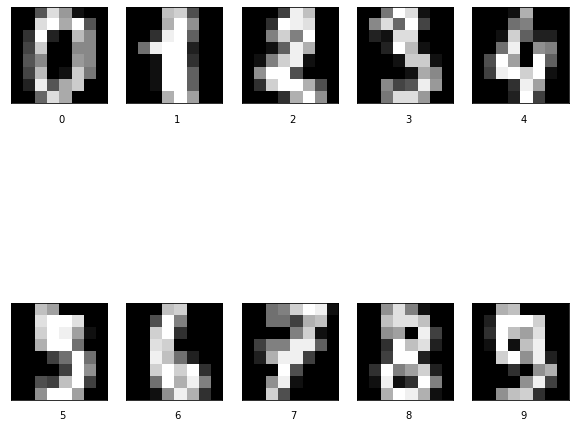

In [7]:
fig, axes = plt.subplots(2,5,figsize=(10,10),subplot_kw = {'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray', interpolation='nearest') 
    ax.text(0.5,-0.2,str(digits.target[i]),transform = ax.transAxes)

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x_digits,y_digits,test_size=0.2,random_state=42,stratify= y_digits)
print("Train size: ",x_train.shape,y_train.shape,"Test Size: ",x_test.shape,y_test.shape )

Train size:  (1437, 64) (1437,) Test Size:  (360, 64) (360,)


In [9]:
mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(x_train,y_train)

MLPClassifier(random_state=42)

In [10]:
y_preds = mlp_clf.predict(x_test)
print(y_test[:20])
print(y_preds[:20])

[5 2 8 1 7 2 6 2 6 5 0 5 9 3 4 4 2 4 9 9]
[5 2 8 1 7 2 6 2 6 5 0 5 9 3 4 4 2 4 9 9]


In [11]:
print("Train Accuracy: ", mlp_clf.score(x_train,y_train))
print("Test Accuracy: ", mlp_clf.score(x_test,y_test))
print("Loss : ", mlp_clf.loss_)

Train Accuracy:  1.0
Test Accuracy:  0.9722222222222222
Loss :  0.0025217979804438824


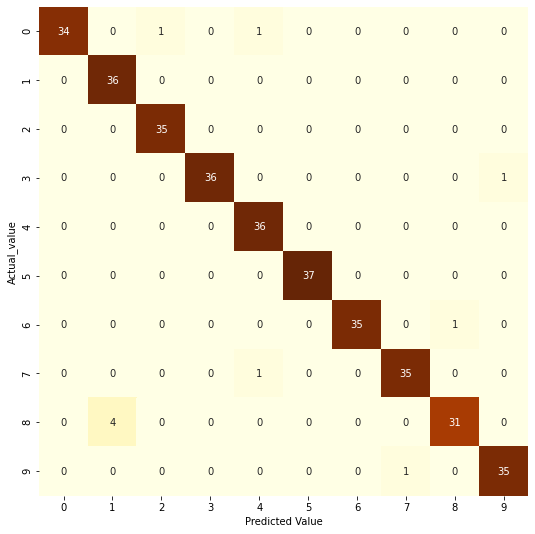

In [12]:
con_max= confusion_matrix(y_test,y_preds)
plt.figure(figsize = (9,9))
sns.heatmap(con_max,annot= True,square= True,cbar= False,cmap='YlOrBr')
plt.xlabel("Predicted Value")
plt.ylabel('Actual_value')
plt.show()

In [13]:
print("Number of Iterations: ",mlp_clf.n_iter_)
print("Output Layer Activation Function :", mlp_clf.out_activation_)

Number of Iterations:  155
Output Layer Activation Function : softmax


# Iris dataset

In [14]:
iris = load_iris()
(X_iris, y_iris) = load_iris(return_X_y = True)

In [15]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state = 0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = MLPClassifier(hidden_layer_sizes = [3,3], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('iris dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

iris dataset
Accuracy of NN classifier on training set: 0.96
Accuracy of NN classifier on test set: 0.97


In [16]:
clf.n_layers_
#clf.n_outputs_
#clf.out_activation_
#clf.coefs_

4

In [17]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from sklearn.metrics import confusion_matrix

In [18]:
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
y_D2


array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

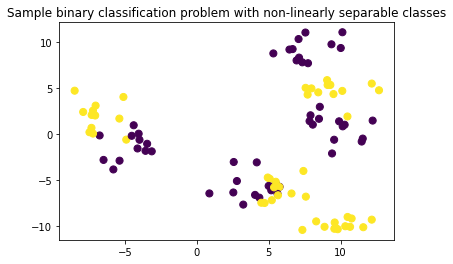

In [19]:
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)
for this_activation in ['logistic', 'tanh', 'relu']:
    nnclf = MLPClassifier(solver='lbfgs', activation = this_activation,
                         alpha = 0.1, hidden_layer_sizes = [20,20,20,20],
                         random_state = 0).fit(X_train, y_train)
    #y_pred=nnclf.predict(X_test)
    print('Accuracy of NN classifier on training set: {:.2f}'
    .format(nnclf.score(X_train, y_train)))
    print('Accuracy of NN classifier on test set: {:.2f}'
    .format(nnclf.score(X_test, y_test)))  
    #confusion_matrix(y_test,y_pred)

Accuracy of NN classifier on training set: 0.51
Accuracy of NN classifier on test set: 0.48
Accuracy of NN classifier on training set: 0.96
Accuracy of NN classifier on test set: 0.72
Accuracy of NN classifier on training set: 0.91
Accuracy of NN classifier on test set: 0.76


C:\Users\nijat\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [21]:
#nnclf.n_layers_
#nnclf.n_outputs_
clf.out_activation_

'softmax'

Fine Tuning model and using different paramenters -
hidden_layer_sizes- It accepts tuple of integer specifying sizes of hidden layers in multi layer perceptrons. According to size of tuple, that many perceptrons will be created per hidden layer. default=(100,)

activation - It specifies activation function for hidden layers. It accepts one of below strings as input. default=relu

**'identity'** - No Activation. f(x) = x

'**logistic**' - Logistic Sigmoid Function. f(x) = 1 / (1 + exp(-x))

'**tanh**' - Hyperbolic tangent function. f(x) = tanh(x)

'**relu**' - Rectified Linear Unit function. f(x) = max(0, x)

**solver** - It accepts one of below strings specifying which optimization solver to use for updating weights of neural network hidden layer perceptrons. default='adam' 'lbfgs' 'sgd' 'adam'

**learning_rate_init** - It specifies initial learning rate to be used. Based on value of this parameter weights of perceptrons are updated.default=0.001

**learning_rate** - It specifies learning rate schedule to be used for training. It accepts one of below strings as value and only applicable when solver='sgd'.

'**constant**' - Keeps learning rate constant through a learning process which was set in learning_rate_init.

'**invscaling**' - It gradually decreases learning rate. effective_learning_rate = learning_rate_init / pow(t, power_t)

'**adaptive**' - It keeps learning rate constant as long as loss is decreasing or score is improving. If consecutive epochs fails in decreasing loss according to tol parameter and early_stopping is on, then it divides current learning rate by 5.

batch_size - It accepts integer value specifying size of batch to use for dataset. default='auto'. The default auto batch size will set batch size to min(200, n_samples).

tol - It accepts float values specifying threshold for optimization. When training loss or score is not improved by at least tol for n_iter_no_change iterations, then optimization ends if learning_rate is constant else it decreases learning rate if learning_rate is adaptive. default=0.0001

alpha - It specifies L2 penalty coefficient to be applied to perceptrons. default=0.0001

**momentum** - It specifies momentum to be used for gradient descent and accepts float value between 0-1. It's applicable when solver is sgd.

**early_stopping** - It accepts boolean value specifying whether to stop training if training score/loss is not improving. default=False

validation_fraction It accepts float value between 0-1 specifying amount of training data to keep aside if early_stopping is set.default=0.1